In [1]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data preparing

Using top 10 features from xgboost

In [2]:
cancer_data = pd.read_csv('../../data/cancer_data_v4.csv')

cancer_data.drop(['WBC', 'EO%', 'EO', 'GLO', 'NEUT%', 'HCT', 'TCH','TBIL', 'IBIL', 'LDH-L'], axis=1, inplace=True)
for fea in cancer_data.columns[6:]:
    median = cancer_data.groupby(['Origin','Age_group', 'A=male B=female'])[fea].median()
    cancer_data.set_index(['Origin','Age_group', 'A=male B=female'], inplace=True)
    cancer_data[fea].fillna(median, inplace=True)
    cancer_data.reset_index(inplace=True)

data = cancer_data.dropna().set_index('Origin')[['Smoke','MCV ','T-CEA','GGT','BASO%','BASO','RDW-SD','RDW-CV','HGB','HDL-C']]

# Analysis

In [3]:
%%time
X_tsne = TSNE(n_components=2, random_state=0).fit_transform(data)
X_pca = PCA(n_components=2).fit_transform(data)
X_umap = umap.UMAP(n_components=2, random_state=0).fit_transform(data)

Wall time: 46.7 s


In [6]:
data['PC1'], data['PC2'] = X_pca[:, 0], X_pca[:, 1]
data['TSNE1'], data['TSNE2'] = X_tsne[:, 0], X_tsne[:, 1]
data['UMAP1'], data['UMAP2'] = X_umap[:, 0], X_umap[:, 1]
data.reset_index(inplace=True)

# Visualization

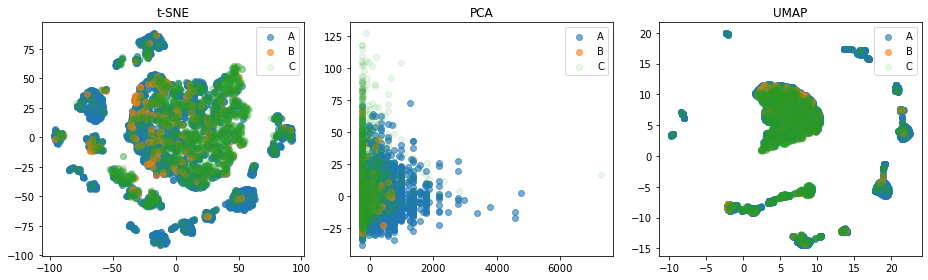

In [7]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 3, 1) 
plt.scatter(data[data['Origin'] == 'A']['TSNE1'], data[data['Origin'] == 'A']['TSNE2'], alpha=0.6, label='A')
plt.scatter(data[data['Origin'] == 'B']['TSNE1'], data[data['Origin'] == 'B']['TSNE2'], alpha=0.6, label='B')
plt.scatter(data[data['Origin'] == 'C']['TSNE1'], data[data['Origin'] == 'C']['TSNE2'], alpha=0.1, label='C')
plt.legend()
plt.title("t-SNE")

plt.subplot(1, 3, 2)
plt.scatter(data[data['Origin'] == 'A']['PC1'], data[data['Origin'] == 'A']['PC2'], alpha=0.6, label='A')
plt.scatter(data[data['Origin'] == 'B']['PC1'], data[data['Origin'] == 'B']['PC2'], alpha=0.6, label='B')
plt.scatter(data[data['Origin'] == 'C']['PC1'], data[data['Origin'] == 'C']['PC2'], alpha=0.1, label='C')
plt.legend()
plt.title("PCA")

plt.subplot(1, 3, 3)
plt.scatter(data[data['Origin'] == 'A']['UMAP1'], data[data['Origin'] == 'A']['UMAP2'], alpha=0.6, label='A')
plt.scatter(data[data['Origin'] == 'B']['UMAP1'], data[data['Origin'] == 'B']['UMAP2'], alpha=0.6, label='B')
plt.scatter(data[data['Origin'] == 'C']['UMAP1'], data[data['Origin'] == 'C']['UMAP2'], alpha=0.1, label='C')
plt.legend()
plt.title("UMAP")

plt.tight_layout()
plt.show()